<a href="https://colab.research.google.com/github/AhmedElrifo/Car-dataset/blob/main/analayzing_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyzing what affects the price ?

# what is the most expensive brand?
# Which are the best brands in sympoling?

In [6]:
# importing libraries and loading dataset

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## EXploratory Analysis And Data Cleaning


In [7]:
# Srtarting cleaning by replacing ? with nan
df=df.replace('?',np.nan)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

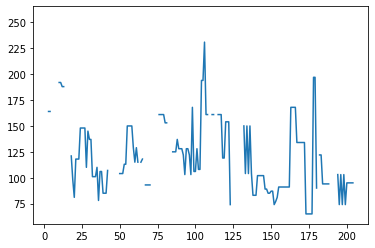

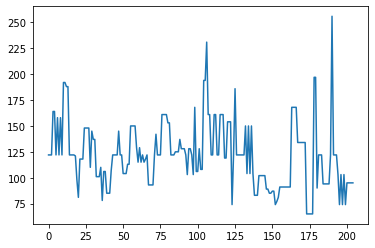

In [8]:
# filling normalized-losses
plt.plot(df['normalized-losses']);
plt.show()
df['normalized-losses']=df['normalized-losses'].astype('float')
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())
plt.plot(df['normalized-losses']);
plt.show()

In [9]:
# filling and cleaning broke and stroke
print(df.bore.get('object'))
df.bore=df.bore.astype('float')
df.bore=df.bore.fillna(df.bore.mean())

df.stroke=df.stroke.astype('float')
df.stroke=df.stroke.fillna(df.stroke.mean())



None


horsepower    object
peak-rpm      object
price         object
dtype: object
None


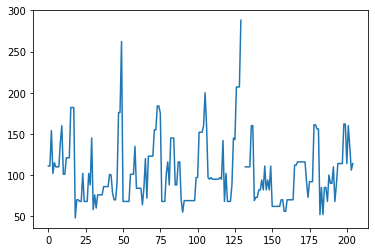

In [10]:
# for horsepower  and  peak-rpm  price
print(df[['horsepower','peak-rpm','price']].dtypes)
print(df[['horsepower','peak-rpm','price']].get('object'))

# horsepower
df.horsepower=df.horsepower.astype('float')
plt.plot(df.horsepower);
df.horsepower=df.horsepower.fillna(df.horsepower.mean())


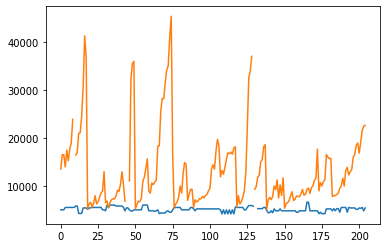

In [11]:
#peak-rpm
df['peak-rpm']=df['peak-rpm'].astype('float')
plt.plot(df['peak-rpm']);
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].mean())

#price
df.price=df.price.astype('float')
plt.plot(df.price);
df.price=df.price.fillna(df.price.mean())

## The distripution of the price 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


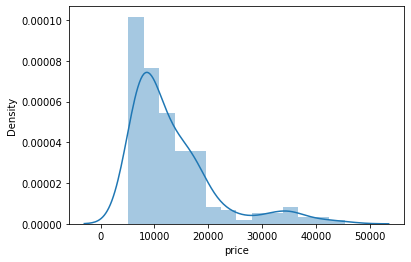

In [12]:
sns.distplot(df.price);

### It's right skewed 

In [13]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


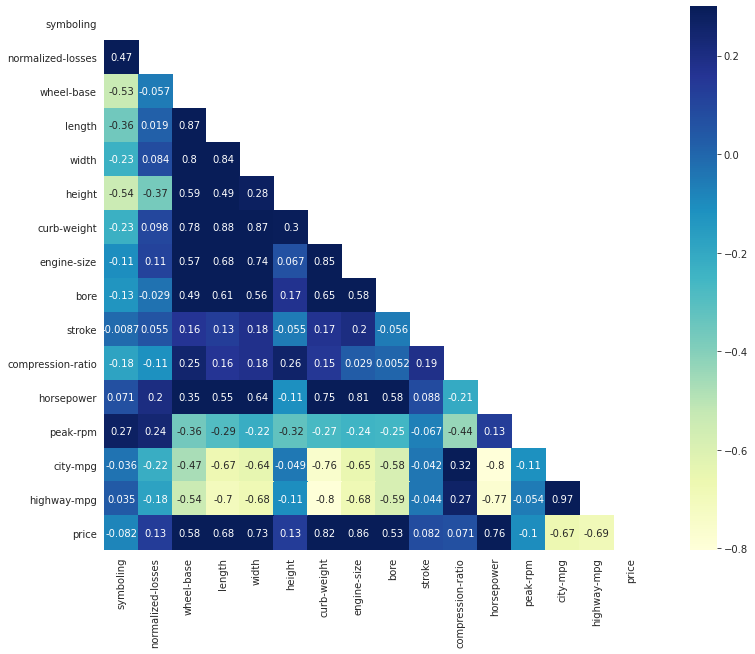

In [14]:
# plotting a heatmab for correlation
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="YlGnBu",annot=True,)

Features that tend to have a relationship with the price feature . these are the features that  i will concentrate my analysis on
These are the numeric values 

In [15]:
# Sorting correlation (descending)
df_corrP=df.corr()['price']

df_corrP=df_corrP[df_corrP >.5].sort_values(ascending=False)
df_corrP

price          1.000000
engine-size    0.861752
curb-weight    0.820825
horsepower     0.757917
width          0.728699
length         0.682986
wheel-base     0.583168
bore           0.532300
Name: price, dtype: float64

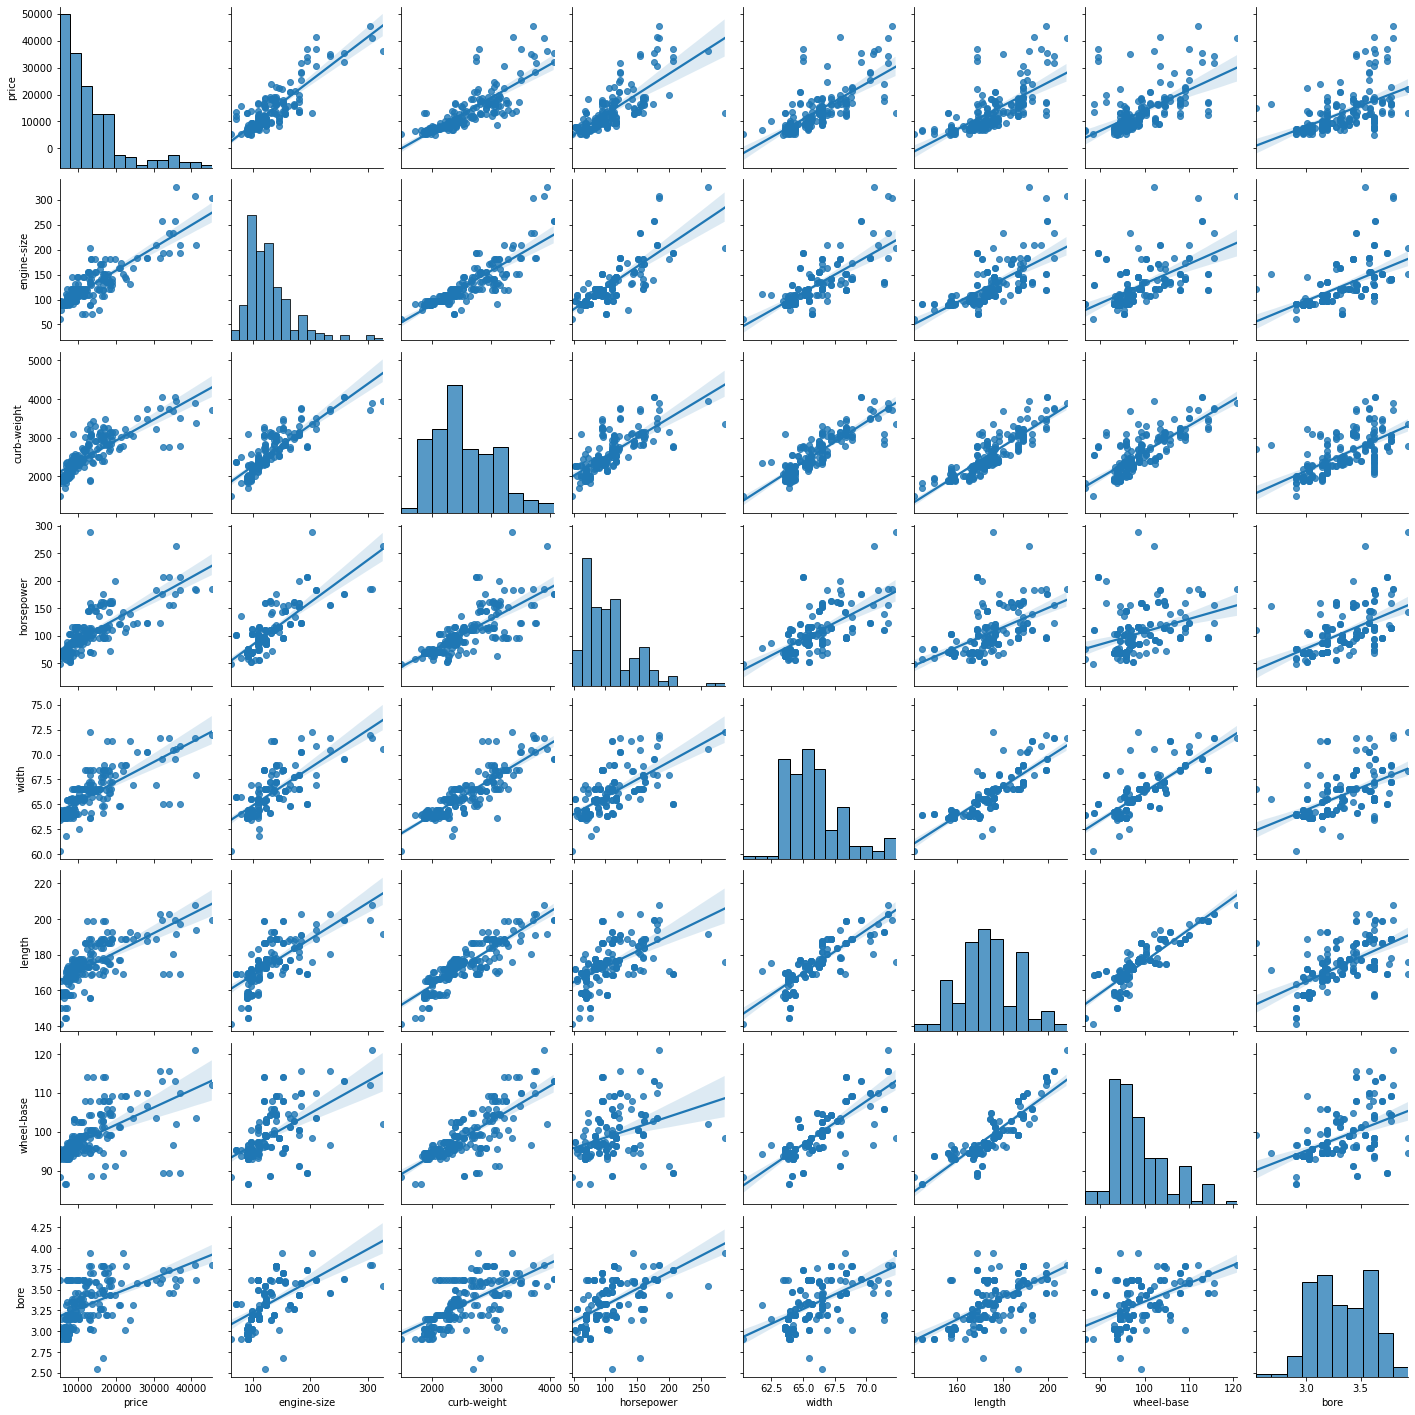

In [18]:

sns.pairplot(df[df_corrP.index],kind='reg')

It seems most of the feature are also correlated to each others 

In [20]:
df_corr=df_corrP
df[df_corr.index].corr()

,price,engine-size,curb-weight,horsepower,width,length,wheel-base,bore
price,1.000000,0.861752,0.820825,0.757917,0.728699,0.682986,0.583168,0.532300
engine-size,0.861752,1.000000,0.850594,0.810713,0.735433,0.683360,0.569329,0.583798
curb-weight,0.820825,0.850594,1.000000,0.750968,0.867032,0.877728,0.776386,0.648485
horsepower,0.757917,0.810713,0.750968,1.000000,0.642195,0.554434,0.351957,0.575737
width,0.728699,0.735433,0.867032,0.642195,1.000000,0.841118,0.795144,0.559152
length,0.682986,0.683360,0.877728,0.554434,0.841118,1.000000,0.874587,0.606462
wheel-base,0.583168,0.569329,0.776386,0.351957,0.795144,0.874587,1.000000,0.488760
bore,0.532300,0.583798,0.648485,0.575737,0.559152,0.606462,0.488760,1.000000


Now I find relations between categorical features and price 

In [21]:
df.select_dtypes(include='object').head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


# Explonatory Analysis 

Does fuel affect the price ?
Yes

Text(0.5, 1.0, 'Diesel VS gas (Price)')

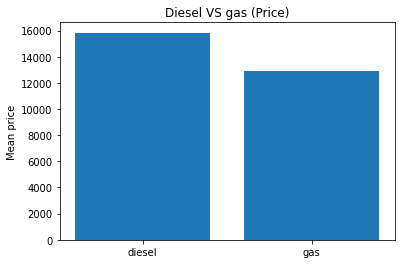

In [22]:
plt.bar(df.groupby('fuel-type').mean()['price'].index,df.groupby('fuel-type').mean()['price'])
plt.ylabel("Mean price")
plt.title("Diesel VS gas (Price)")
# YES the fuel type greatly affects the price 

What are the most expensive cars?

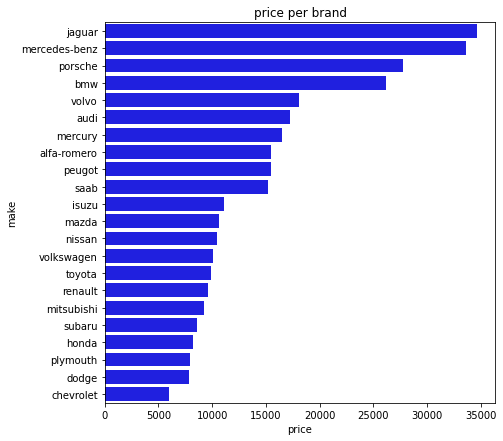

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(y=df.groupby('make').mean()['price'].sort_values(ascending=False).index,x=df.groupby('make').mean()['price'].sort_values(ascending=False),orient='h',color='b')
plt.title("price per brand")
#plt.xticks(rotation=90)
plt.show()
# YES the fuel type greatly affects the price 

What about engine-location?
what's more expensive rear or front?

Text(0.5, 1.0, 'Engine Location')

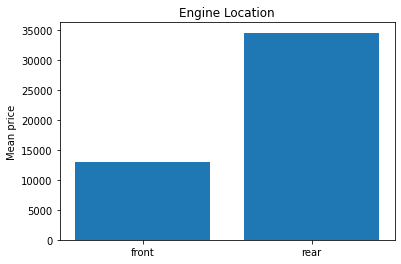

In [24]:
plt.bar(df.groupby('engine-location').mean()['price'].index,df.groupby('engine-location').mean()['price'])
plt.ylabel("Mean price")
plt.title("Engine Location")

In [25]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

Text(0.5, 1.0, 'engine-type')

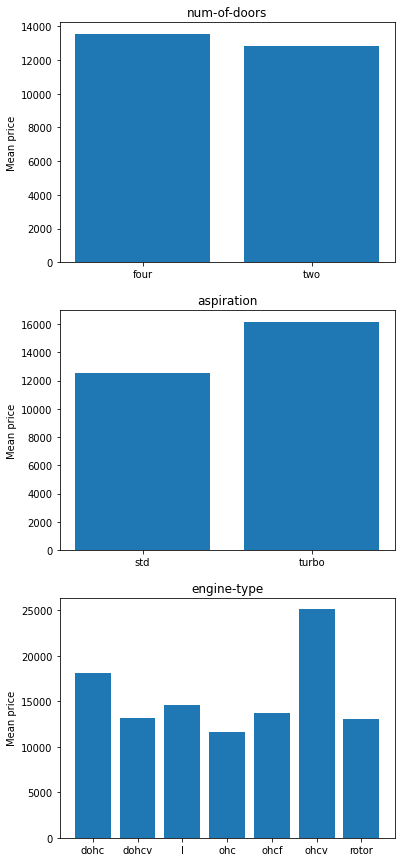

In [26]:
plt.figure(figsize=(6,15))
ax1 = plt.subplot(3,1,1)
ax1.bar(df.groupby('num-of-doors').mean()['price'].index,df.groupby('num-of-doors').mean()['price'])
ax1.set_ylabel("Mean price")
ax1.set_title("num-of-doors")

ax2=plt.subplot(3,1,2)
ax2.bar(df.groupby('aspiration').mean()['price'].index,df.groupby('aspiration').mean()['price'])
ax2.set_ylabel("Mean price")
ax2.set_title("aspiration")

ax3=plt.subplot(3,1,3)
ax3.bar(df.groupby('engine-type').mean()['price'].index,df.groupby('engine-type').mean()['price'])
ax3.set_ylabel("Mean price")
ax3.set_title("engine-type")

In [27]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Finding what affects the symboling

In [28]:

df_corr=df.corr()['symboling']

df_corr=df_corr[(df_corr >.5)|(df_corr <-.5)].sort_values(ascending=False)
df_corr

symboling     1.000000
wheel-base   -0.531954
height       -0.541038
Name: symboling, dtype: float64

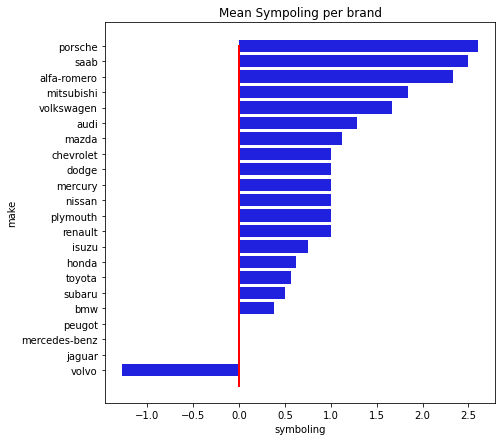

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(y=df.groupby('make').mean()['symboling'].sort_values(ascending=False).index,x=df.groupby('make').mean()['symboling'].sort_values(ascending=False),orient='h',color='b')
plt.title("Mean Sympoling per brand")
plt.plot([0,0],[0,22],color='r',linewidth=2, markersize=12)

plt.show()
# YES the fuel type greatly affects the price 

In [30]:
df_corrP.index

Index(['price', 'engine-size', 'curb-weight', 'horsepower', 'width', 'length',
       'wheel-base', 'bore'],
      dtype='object')

In [31]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [32]:
new_df=df[['price', 'engine-size', 'curb-weight', 'horsepower', 'width', 'length',
       'wheel-base', 'bore','fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders','fuel-system']]


#Linear Regession
predicting the price by the numerical features

In [33]:

from sklearn.model_selection import train_test_split
X=df[['engine-size', 'curb-weight', 'horsepower', 'width', 'length',
       'wheel-base', 'bore']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
fit=lr.fit(X_train,y_train)
pred=fit.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(lr.score(X_test,y_test))
print(sqrt(mean_squared_error(y_test,pred)))

0.7943361141920873
3708.927782932304


The root mean square error is 3708.927
and the accuracy is .79


# **Conclusion**



*   There are many factors strongly correlated with price .ex , Engine Location ,etc.
*   The most expensive brand is jaguar
*   The safest brand is Porsche 
*   The worst brand in safety is Volvo
*   features correlated with symboling are heigth ,wheel-base




